# 0. Load the Dataset from CSV Files

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  
plt.style.use('ggplot')

from pandas.plotting import scatter_matrix

In [2]:
# Load processed training and test data
!ls -al
!mkdir prognostic

from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/My\ Drive/MLProjects/Prognostic/data/*.csv /content/prognostic
! ls -al /content/prognostic

total 16
drwxr-xr-x 1 root root 4096 Aug 27 16:17 .
drwxr-xr-x 1 root root 4096 Sep  3 09:38 ..
drwxr-xr-x 1 root root 4096 Aug 28 16:06 .config
drwxr-xr-x 1 root root 4096 Aug 27 16:17 sample_data
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
total 21116
drwxr-xr-x 2 root root     4096 Sep  3 09:41 .
drwxr-xr-x 1 root root     4096 Sep  3 09:41 ..
-rw------- 1 root root  2153095 Sep  3 09:41 test.csv
-rw------- 1 root root    78607 Sep  3 09:41 test_processed.csv
-rw------- 1 root root  3395968 Sep  3 09

In [3]:
df_train=pd.read_csv('prognostic/train_processed.csv')
df_test=pd.read_csv('prognostic/test_processed.csv')
df_test_original = pd.read_csv('prognostic/test.csv')

display(df_train.head(3), df_test.head(3), df_test_original.head(3))

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_av,s2_av,s3_av,s4_av,s5_av,s6_av,s7_av,s8_av,s9_av,s10_av,s11_av,s12_av,s13_av,s14_av,s15_av,s16_av,s17_av,s18_av,s19_av,s20_av,s21_av,s1_std,s2_std,s3_std,s4_std,s5_std,s6_std,s7_std,s8_std,s9_std,s10_std,s11_std,s12_std,s13_std,s14_std,s15_std,s16_std,s17_std,s18_std,s19_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,518.67,641.820000,1589.700000,1400.600000,14.62,21.61,554.360000,2388.06,9046.190000,1.3,47.47,521.66,2388.020,8138.620000,8.419500,0.03,392.000000,2388.0,100.0,39.060000,23.4190,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,518.67,641.985000,1590.760000,1401.870000,14.62,21.61,554.055000,2388.05,9045.130000,1.3,47.48,521.97,2388.045,8135.055000,8.425650,0.03,392.000000,2388.0,100.0,39.030000,23.4213,0.0,0.233345,1.499066,1.796051,0.0,0.0,0.431335,0.014142,1.499066,0.0,0.014142,0.438406,0.035355,5.041671,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,518.67,642.106667,1589.836667,1402.646667,14.62,21.61,554.123333,2388.06,9047.733333,1.3,47.41,522.12,2388.040,8134.446667,8.423033,0.03,391.333333,2388.0,100.0,39.003333,23.3956,0.0,0.267644,1.918654,1.850009,0.0,0.0,0.327159,0.020000,4.632023,0.0,0.121655,0.404475,0.026458,3.717450,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s1_av,s2_av,s3_av,s4_av,s5_av,s6_av,s7_av,s8_av,s9_av,s10_av,s11_av,s12_av,s13_av,s14_av,s15_av,s16_av,s17_av,s18_av,s19_av,s20_av,s21_av,s1_std,s2_std,s3_std,s4_std,s5_std,s6_std,s7_std,s8_std,s9_std,s10_std,s11_std,s12_std,s13_std,s14_std,s15_std,s16_std,s17_std,s18_std,s19_std,s20_std,s21_std,rul,label_bnc,label_mcc
0,1,31,-0.0006,0.0004,100.0,518.67,642.58,1581.22,1398.91,14.62,21.61,554.42,2388.08,9056.40,1.3,47.23,521.79,2388.06,8130.11,8.4024,0.03,393,2388,100.0,38.81,23.3552,518.67,642.44,1584.696667,1399.330000,14.62,21.61,554.223333,2388.083333,9049.986667,1.3,47.350000,521.986667,2388.076667,8132.676667,8.411533,0.03,392.000000,2388.0,100.0,38.973333,23.374733,0.0,0.437150,3.094614,1.475534,0.0,0.0,0.172143,0.005774,5.594375,0.0,0.104403,0.349333,0.020817,2.372706,0.009411,0.0,1.00000,0.0,0.0,0.145717,0.028070,112,0,0
1,2,49,0.0018,-0.0001,100.0,518.67,642.55,1586.59,1410.83,14.62,21.61,553.52,2388.10,9044.77,1.3,47.67,521.74,2388.09,8126.90,8.4505,0.03,391,2388,100.0,38.81,23.2618,518.67,642.68,1587.293333,1408.673333,14.62,21.61,553.686667,2388.113333,9047.940000,1.3,47.536667,521.763333,2388.103333,8127.106667,8.439700,0.03,391.666667,2388.0,100.0,38.893333,23.283367,0.0,0.153948,0.612563,4.747803,0.0,0.0,0.491664,0.061101,3.917742,0.0,0.119304,0.455448,0.011547,1.570234,0.015373,0.0,0.57735,0.0,0.0,0.090738,0.018825,98,0,0
2,3,126,-0.0016,0.0004,100.0,518.67,642.88,1589.75,1418.89,14.62,21.61,552.59,2388.16,9049.26,1.3,47.88,520.83,2388.14,8131.46,8.4119,0.03,395,2388,100.0,38.93,23.2740,518.67,643.06,1589.626667,1414.756667,14.62,21.61,552.663333,2388.160000,9048.406667,1.3,47.703333,520.610000,2388.170000,8131.030000,8.442600,0.03,394.666667,2388.0,100.0,38.723333,23.245433,0.0,0.180000,0.931146,3.580703,0.0,0.0,0.405010,0.030000,0.752152,0.0,0.153080,0.416173,0.036056,2.819699,0.026739,0.0,0.57735,0.0,0.0,0.188768,0.025085,69,0,0


,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.2,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.5,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.5,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166


In [0]:
original_features = ['setting1', 'setting2', 'setting3', 's1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
sensor_features = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20', 's21']
constant_features = ['setting3','s1', 's5' , 's6', 's10', 's16', 's18', 's19']
variable_features = ['setting1', 'setting2', 's2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']
constant_sensor_features = ['s1', 's5' , 's6', 's10', 's16', 's18', 's19']
variable_sensor_features = ['s2','s3','s4','s7','s8','s9','s11','s12','s13','s14','s15','s17','s20', 's21']

# 1. Exploratory Data Analysis

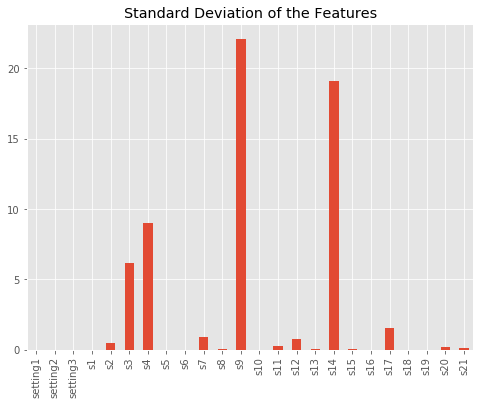

In [5]:
#plot and compare the standard deviation of the input features
df_train[original_features].std().plot(kind='bar', figsize=(8,6), title="Standard Deviation of the Features")

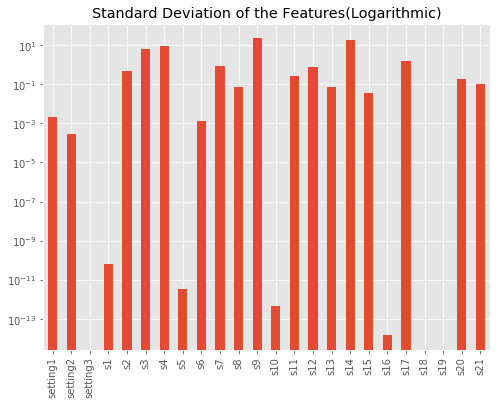

In [6]:
# plotting the logarithmic standard deviation for the input features
df_train[original_features].std().plot(kind='bar', figsize=(8,6), logy=True, title="Standard Deviation of the Features(Logarithmic)")

In [7]:
# Let's have a look at the features with maximum variability based on standard deviation calculation. 

features_top_variability = df_train[original_features].std().sort_values(ascending=False)
display(features_top_variability)

#Lets also observe which features shows the correlation with the regression label ttf
#features_top_var = df_tr_lbl[features].std().sort_values(ascending=False)
#features_top_var
#df_tr_lbl[features].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s1          6.537152e-11
s5          3.394700e-12
s10         4.660829e-13
s16         1.556432e-14
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
dtype: float64

In [8]:
#Let's have a look at the features which are correlated with the regression label RUL
display(df_train[original_features].corrwith(df_train.rul).sort_values(ascending=False))

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -3.969701e-16
s5         -3.969701e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

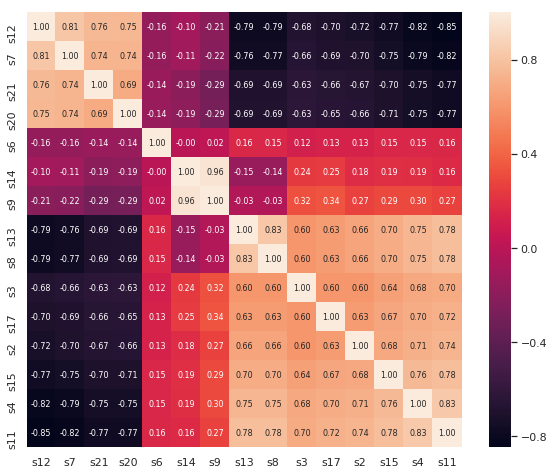

In [9]:
# list of features having high correlation with regression label ttf

correl_features = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']
import seaborn as sns
cm = np.corrcoef(df_train[correl_features].values.T)
sns.set(font_scale = 1.0)
fig = plt.figure(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':8}, yticklabels=correl_features, xticklabels=correl_features)
plt.title = ('Features Correlation Map')
plt.show()

There is very high correlation between some of the features (>0.8): (s14,s9), (s11,s4), (s11,s7), (s11,s12), (s4,s12), (s8,13), (s7, s12) etc. This may hurt the performance of some ML algorithms

So some of these features will be the target for the the feature removal

/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffab8194b38>,
      dtype=object)

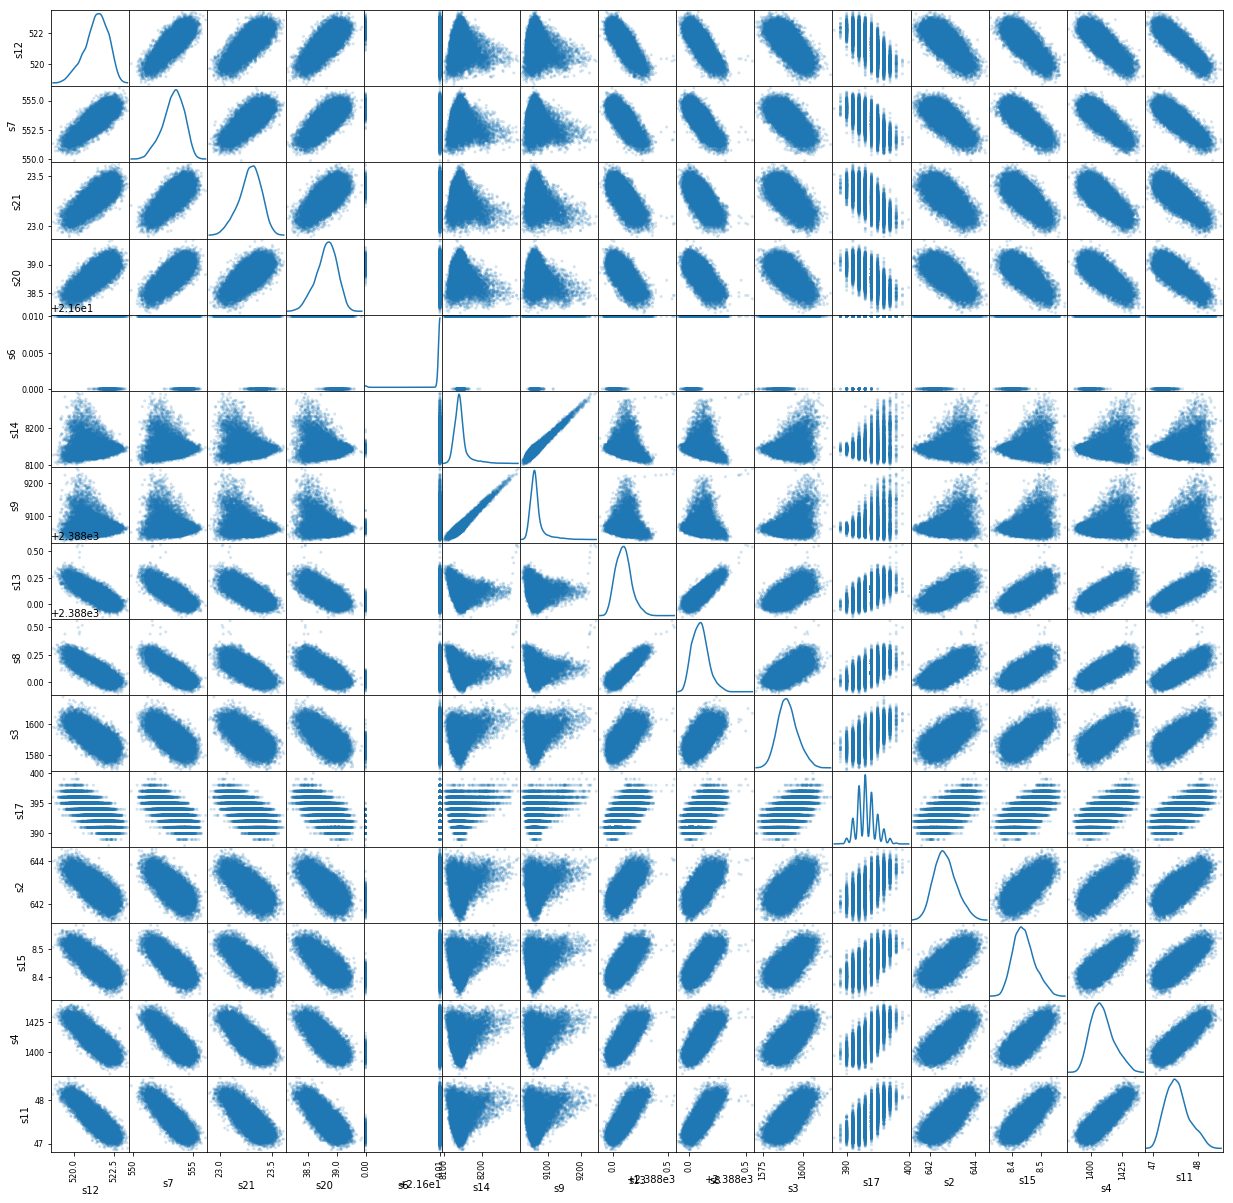

In [10]:
#rest the original matplotlib theme
sns.reset_orig()

#create scatter matrix to display relationships and distribution among the features and regression label
scatter_matrix(df_train[correl_features], alpha=0.2, figsize=(21,21), diagonal='kde')

In [0]:
# As we can see above that most of the features have NORMAL DISTRIBUTION, which is helpful for Machine Learning Algorithms
# Most of the features have non linear relationship Regression Label TTF, so using Polynomial Models may lead to better results

# Let's create a helper function to ease exploration of individual features.

def explore_col(s, e):
  """
  plot 4 main graphs for a single feature
  
  plot1: histogram
  plot2: boxplot
  plot3: lineplot (timeseries over the cycle)
  plot4: scatter plot vs regression label rul
  
  Args:
  s(str): the column name of the feature
  e(int): the number of random engines to be plotted for plot 3. Range from 1 - 100
  
  Returns plots
  """
  
  fig = plt.figure(figsize=(10,8))
  
  sub1 = fig.add_subplot(221)
  sub1.set_title(s+'histogram')
  sub1.hist(df_train[s])
  
  sub2 = fig.add_subplot(222)
  sub2.set_title(s+'boxplot')
  sub2.boxplot(df_train[s])
  
  if e>100 or e<=0:
    select_engines = list(pd.unique(df_train.id))
  else:
    select_engines = np.random.choice(range(1,101), e, replace=False)
    
  sub3 = fig.add_subplot(223)
  sub3.set_title('Time Series:' + s + '/ cycle')
  sub3.set_xlabel('cycle')
  for i in select_engines:
    df=df_train[['cycle',s]][df_train['id']==i]
    sub3.plot(df['cycle'], df[s])
    
  sub4 = fig.add_subplot(224)
  sub4.set_title("Scatter: "+s + "/ rul(regr label)")
  sub4.set_xlabel('rul')
  sub4.scatter(df_train['rul'], df_train[s])
  
  plt.tight_layout()
  plt.show()


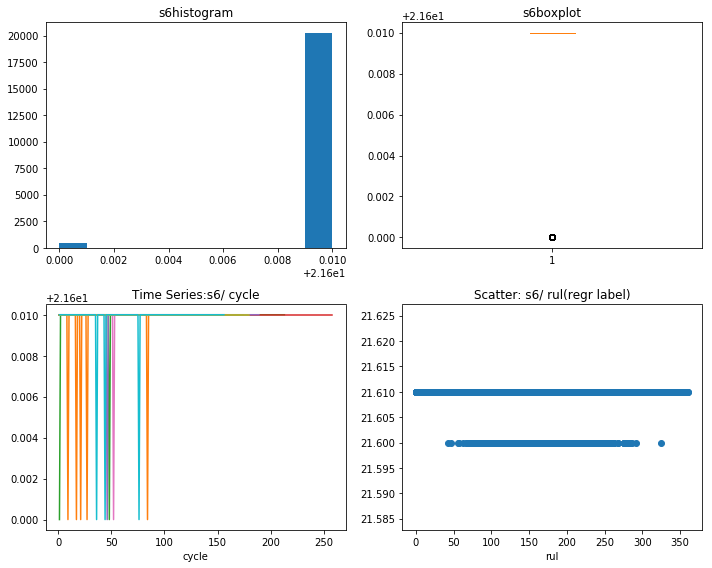

In [12]:
explore_col("s6", 10)

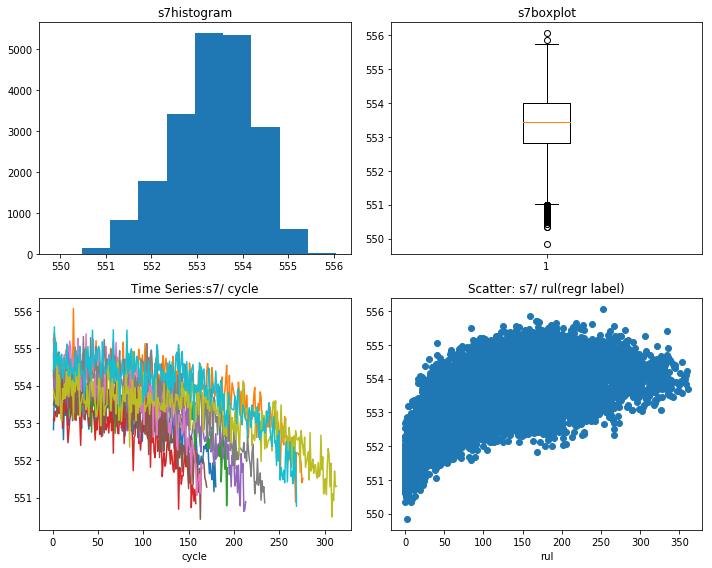

In [13]:
explore_col("s7", 10)

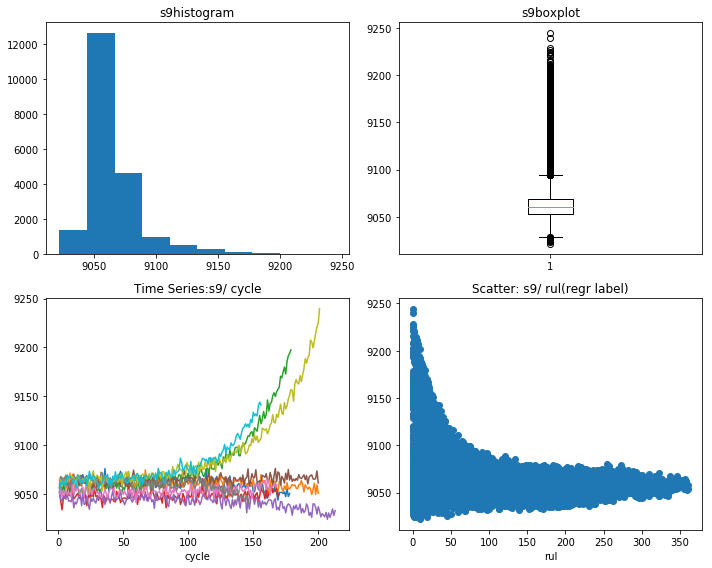

In [14]:
explore_col("s9", 10)

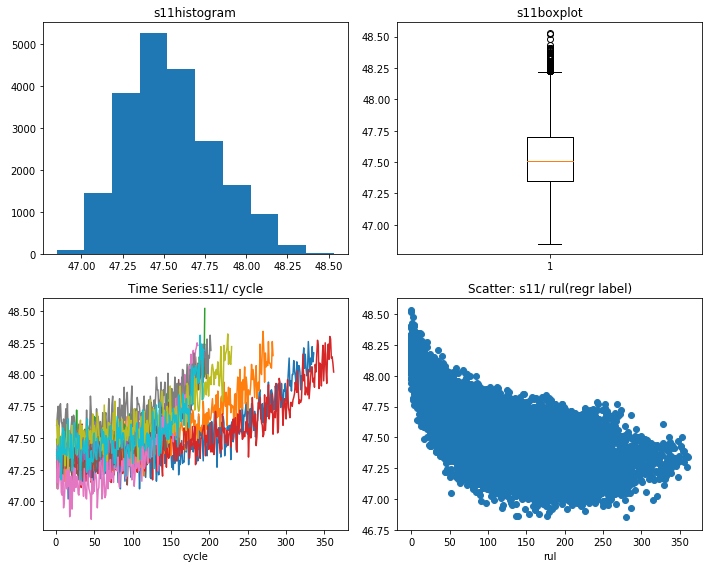

In [15]:
explore_col("s11", 10)

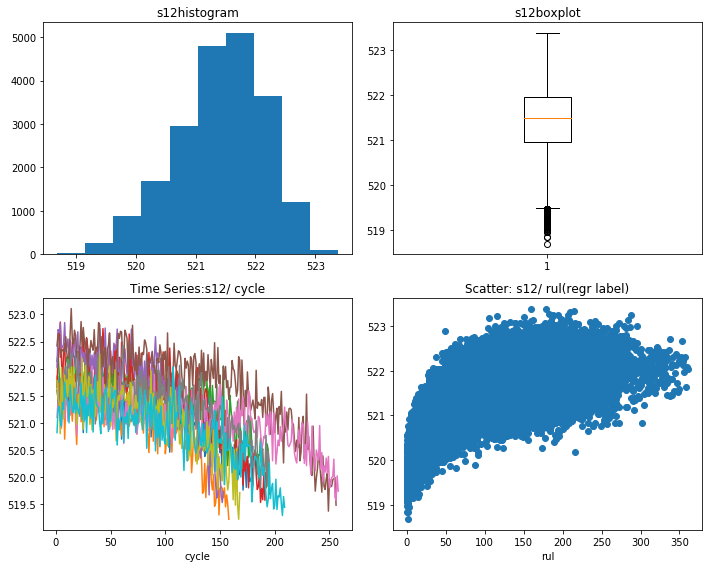

In [16]:
explore_col("s12", 10)

In [0]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):
  """ Plot time series of a single sensor for 10 random sample engines
  
  Args:
  s(str): The column name of the sensor to be plotted
  
  Returns:
  plots
  """
  fig,axes = plt.subplots(10,1,sharex=True, figsize=(15,15))
  fig.suptitle(s + ' time series / cycle', fontsize=15)
  
  select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()
  
  for e_id in select_engines:
    df = df_train[df_train['id']==e_id][['cycle', s]]
    i = select_engines.index(e_id)
    axes[i].plot(df['cycle'], df[s])
    axes[i].set_ylabel('engine'+str(e_id))
    axes[i].set_xlabel('cycle')
    
  plt.subplots_adjust(wspace=0, hspace=0)
  plt.show()


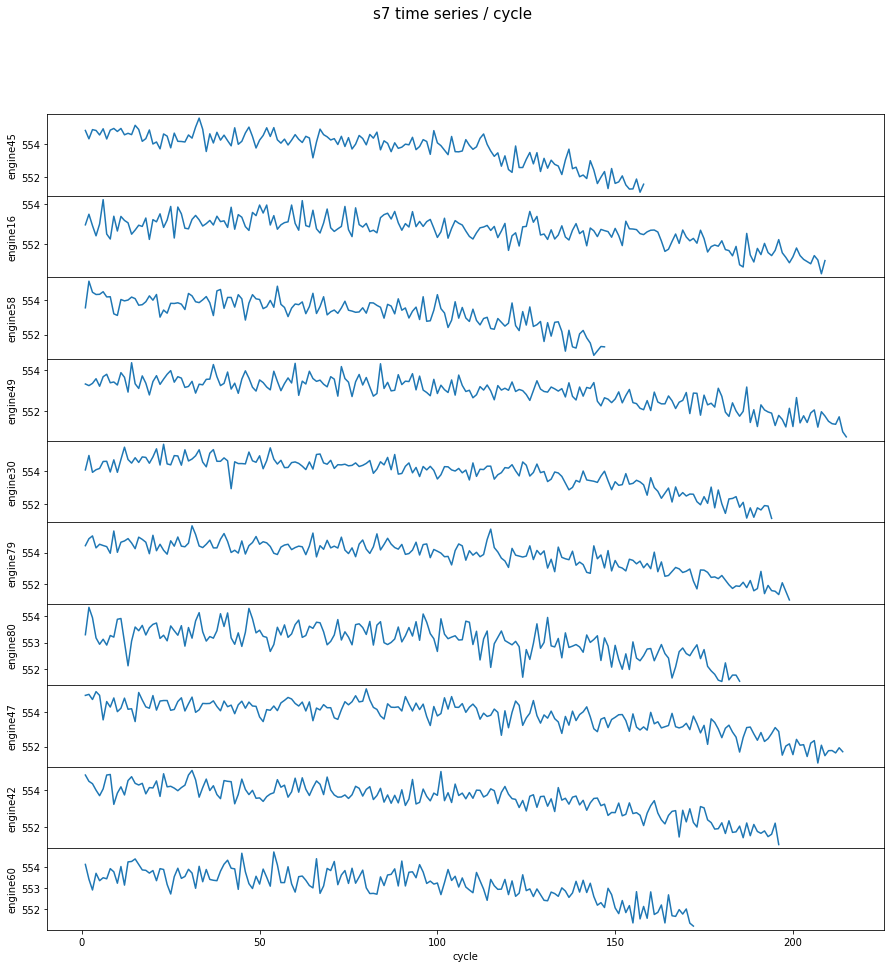

In [18]:
plot_time_series('s7')

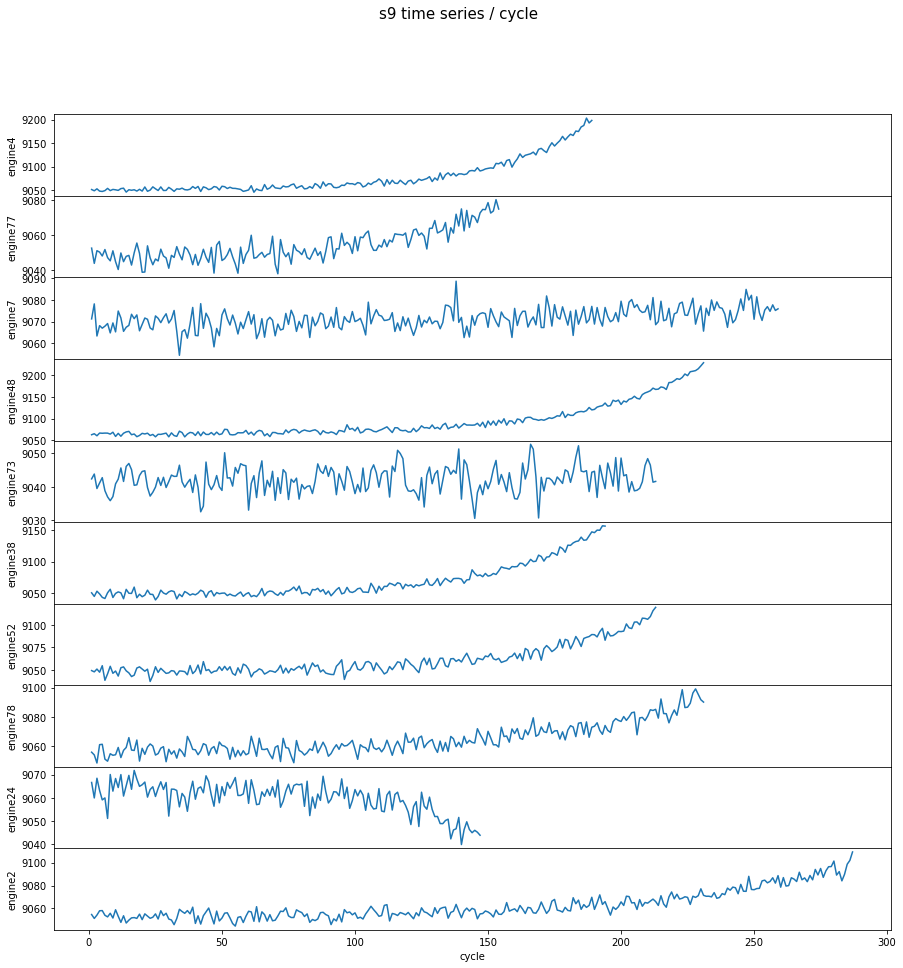

In [19]:
plot_time_series('s9')

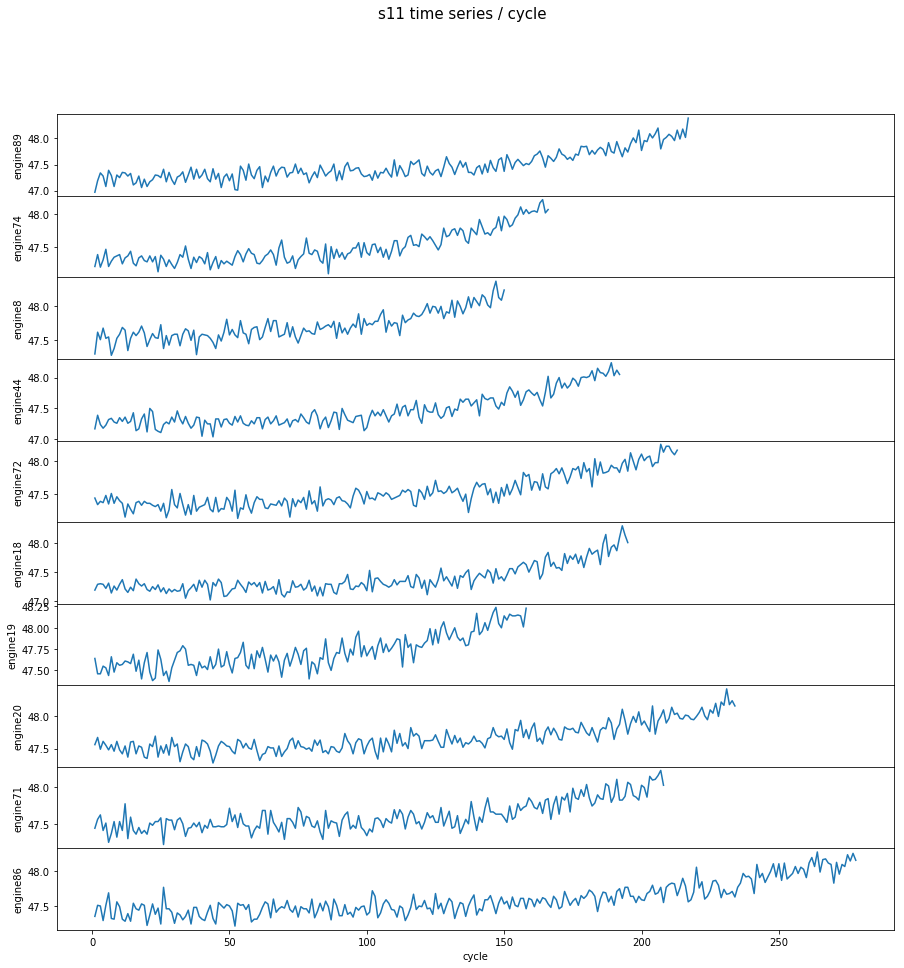

In [20]:
plot_time_series('s11')

In [21]:
#Print Stats for Binary Classification Label
print(df_train['label_bnc'].value_counts())
print('\nNegative Samples = {0:.0%}'.format(df_train['label_bnc'].value_counts()[0]/df_train['label_bnc'].count()))
print('\nPositive Samples = {0:.0%}'.format(df_train['label_bnc'].value_counts()[1]/df_train['label_bnc'].count()))


0    17531
1     3100
Name: label_bnc, dtype: int64

Negative Samples = 85%

Positive Samples = 15%


In [23]:
#Print Stats for Binary Classification Label
print(df_test['label_bnc'].value_counts())
print('\nNegative Samples = {0:.0%}'.format(df_test['label_bnc'].value_counts()[0]/df_test['label_bnc'].count()))
print('\nPositive Samples = {0:.0%}'.format(df_test['label_bnc'].value_counts()[1]/df_test['label_bnc'].count()))

0    72
1    28
Name: label_bnc, dtype: int64

Negative Samples = 72%

Positive Samples = 28%


In [22]:
# print stat for multiclass classification label

print(df_train['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[0]/df_train['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[1]/df_train['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_train['label_mcc'].value_counts()[2]/df_train['label_mcc'].count()))


0    17531
2     1600
1     1500
Name: label_mcc, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


In [24]:
# print stat for multiclass classification label

print(df_test['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_test['label_mcc'].value_counts()[0]/df_test['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_test['label_mcc'].value_counts()[1]/df_test['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_test['label_mcc'].value_counts()[2]/df_test['label_mcc'].count()))


0    72
2    16
1    12
Name: label_mcc, dtype: int64

Class 0 samples =  72%

Class 1 samples =  12%

Class 2 samples =  16%


Same is true for Multi Class classification label. Data is highly unbalanced so accruacy cannot be used as a performance metric


###Summary of Exploratory Data Analysis
* Following approaches may be used for feature reduction i.e. reduce number of features
>* Features with zero variation (i.e. zero standard deviation) can be removed  - s1, s5, s10, s16, s18, s19 and setting3
>* Features with variation less than a threshold (say 0.2) can be removed if required - s10, s21, s13, s8, s15, s6, setting1, setting2
>* There are feature pairs with high degree of correlation amongst themselves (multi collinearity) - (s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 &s12).  One feature each from these pairs can be removed to reduce the number of features and also improve machine learning performance.

* There are outliers in almost all the feature data series. We can look to pre process the data to remove the outliers to improve the performance of the machine learning models if required.

* We can also consider to perform the feature scaling as there is large variation in the value range of the individual features (this will assist the machine learning to minimize the cost function faster)

* Our dataset has a class imbalance problem for binary classification and and multiclass classification labels – we only have 20-30% of data with Positive Predictions (i.e. air turbine will fail) and 70-80% of the data with Negative Prediction. So while chosing machine learning evaluation metrics – Accuracy will not be an appropriate measure and we should consider other metrics which takes into account False Negative as well. Evaluation approaches like Precision-Recall curve, F1Score, AUC-ROC should be considered
